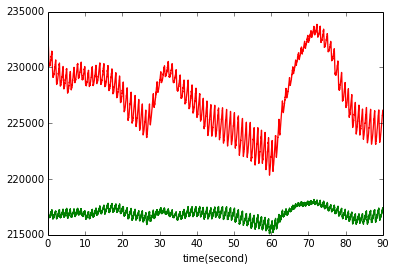

In [69]:
%matplotlib inline

from numpy import genfromtxt
import matplotlib.pyplot as plt
data=genfromtxt('sample_no_header.csv',delimiter=',')

time = [row[0] for row in data]
IR = [row[1] for row in data]
RED = [row[2] for row in data]

fig = plt.figure()
plt.xlabel('time(second)')
plt.plot(time,IR,'g',lw=1.3)
plt.plot(time,RED,'r',lw=1.3)
plt.show()

37.5
13.888888888888891
9.868421052631579
10.135135135135132
9.868421052631582
9.374999999999996
10.41666666666667
10.135135135135132
12.500000000000007
23.43749999999998
14.423076923076911
10.714285714285726
12.500000000000007
24.99999999999994
13.392857142857132
18.749999999999982
23.43750000000011
15.624999999999986
20.833333333333368
17.85714285714286
11.71874999999999
8.522727272727264
11.029411764705888
19.73684210526321
14.423076923076886
12.93103448275862
12.096774193548402
8.33333333333333
11.029411764705888
13.88888888888891
11.363636363636362
17.857142857142783
23.43749999999998
26.785714285714516
17.857142857142783
20.833333333333368
18.750000000000068
10.714285714285671
37.500000000000135
11.029411764705888
19.73684210526321
17.045454545454497
15.0
10.135135135135156
10.135135135135108
11.363636363636362
28.846153846154067
23.43749999999998
16.304347826086925
11.363636363636362
17.045454545454497
17.857142857142936
19.73684210526321
15.0
14.423076923076836
20.8333333333333

/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


 16.124538947053438


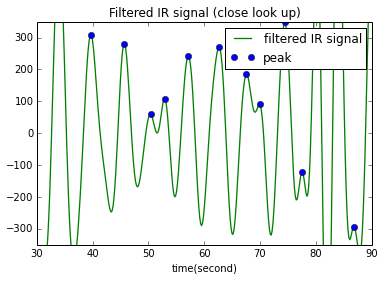

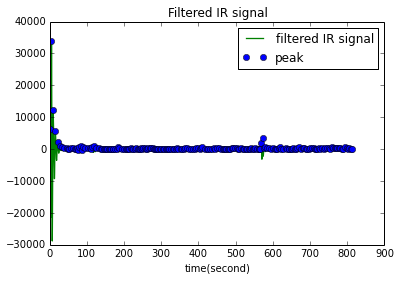

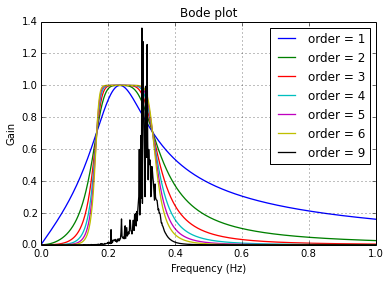

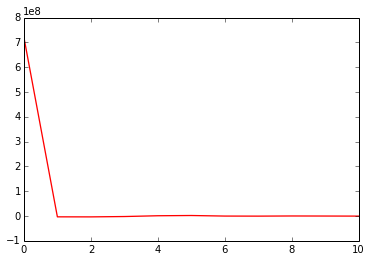

In [9]:
%matplotlib inline

from scipy.signal import butter, lfilter

# Creates and returns Butterworth bandpass filter by given cutoff frequencies, sampling rate, and order
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a

# Applies Butterworth bandpass filter to given data and returns filtered data
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Counts peaks of given dataset
def count_peaks(dataset):
    peak_num = 0
    peak_time = []
    peak_val = []
    for (num, data) in enumerate(dataset):
        if 1 < num < len(dataset)-1:
            if dataset[num-1] < data  and data > dataset[num+1]:
                peak_time.append(num*0.16)
                peak_val.append(data)
                peak_num += 1
    return peak_time, peak_val, peak_num

if __name__ == "__main__":
    from numpy import genfromtxt, fft, pi, sqrt
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    data = genfromtxt('data-sit-swapna-no-header.csv',delimiter=',') # Be sure to remove the header of "sample.csv" beforehands

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 6.25
    lowcut = 1/6
    highcut = 1/3
    
    # Extract sampling time and IR data from CSV file
    time = [row[0]*0.16 for row in data]
    IR = [row[1] for row in data]

    # Filter IR data
    Filtered_IR = butter_bandpass_filter(IR, lowcut, highcut, fs, order=4)
    
    # Find peak time, peak value and number of peaks in filtered data
    peak_time, peak_val, peak_num = count_peaks(Filtered_IR)
    
    respiration_rate = []
    f = open('respirationRate.csv', 'w+')
    for i, t in enumerate(peak_time):
        if i == 0:
            f.write(str(60/t) + '\n')
            print(60/t)
            respiration_rate.append(60/t)
        elif i < len(peak_time)-1:
            f.write(str(60/(peak_time[i+1]-t)) + '\n')
            print(60/(peak_time[i+1]-t))
            respiration_rate.append(60/(peak_time[i+1]-t))
    f.close()
    
    # Calculate and display resipration rate
    print('Average respiration rate: ', sum(respiration_rate)/float(len(respiration_rate)))
    
    # Display filtered data with peaks (closer look up to small signals)
    plt.figure(1)
    plt.xlabel('time(second)')
    plt.plot(time, Filtered_IR, 'g', lw=1.3, label="filtered IR signal")
    plt.plot(peak_time, peak_val, 'o', label="peak")
    plt.title('Filtered IR signal (close look up)')
    plt.legend(loc='best')
    plt.xlim([30, 90])
    plt.ylim([-350, 350])
    
    # Display filtered data with peaks
    plt.figure(2)
    plt.xlabel('time(second)')
    plt.plot(time, Filtered_IR, 'g', lw=1.3, label="filtered IR signal")
    plt.plot(peak_time, peak_val, 'o', label="peak")
    plt.legend(loc='best')
    plt.title('Filtered IR signal')
    
    # Display bandpass filter Bode plot
    plt.figure(3)
    for order in [1, 2, 3, 4, 5, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000) # freqz: Calculates frequency response of a given filter
        plt.plot((fs * 0.5 / pi) * w, abs(h), label="order = %d" % order, lw=1.3)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Bode plot')
    plt.xlim([0, 1])
    
    plt.figure(4)
    plt.plot(fft.fft(IR), 'r', lw=1.3)
    plt.xlim([0, 10])
    
    plt.show()

88.23529411764706
81.08108108108108
76.92307692307692
75.0
71.42857142857143
55.55555555555556
76.92307692307692
103.44827586206897
78.94736842105263
53.57142857142857
68.18181818181819
55.55555555555556
63.829787234042556
54.54545454545455
63.829787234042556
54.54545454545455
63.829787234042556
53.57142857142857
73.17073170731707
63.829787234042556
58.8235294117647
62.5
55.55555555555556
63.829787234042556
61.224489795918366
60.0
54.54545454545455
57.69230769230769
58.8235294117647
62.5
63.829787234042556
62.5
57.69230769230769
58.8235294117647
57.69230769230769
60.0
58.8235294117647
58.8235294117647
56.60377358490566
57.69230769230769
61.224489795918366
51.724137931034484
58.8235294117647
54.54545454545455
58.8235294117647
63.829787234042556
60.0
58.8235294117647
56.60377358490566
60.0
57.69230769230769
56.60377358490566
54.54545454545455
60.0
56.60377358490566
53.57142857142857
56.60377358490566
54.54545454545455
57.69230769230769
57.69230769230769
62.5
61.224489795918366
62.5
63.82

/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


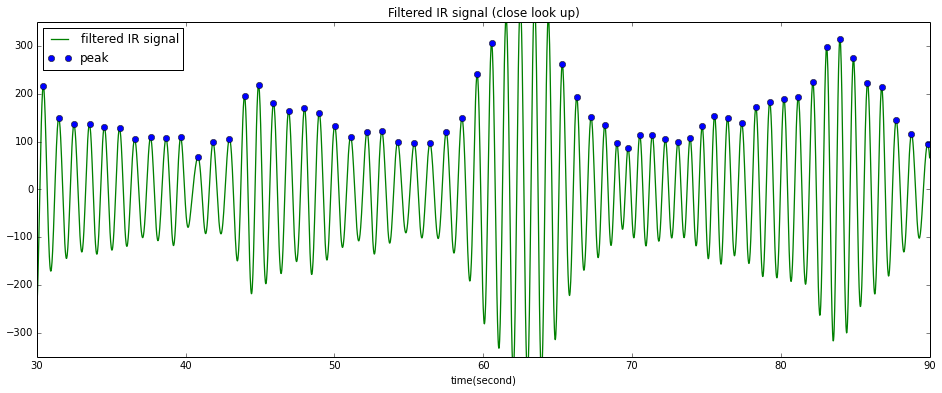

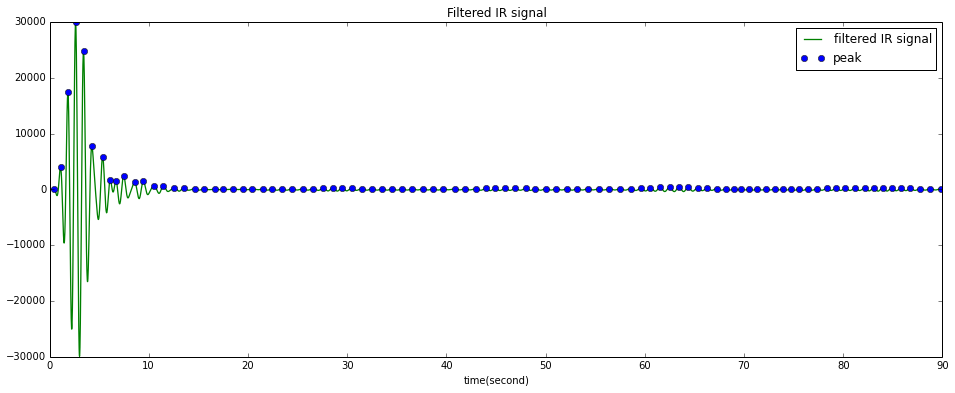

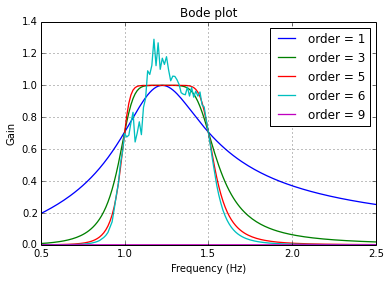

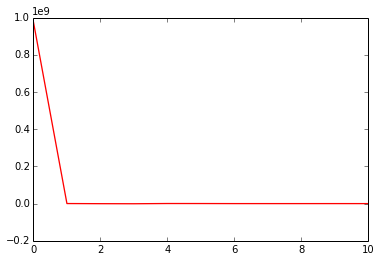

In [135]:
%matplotlib inline

from scipy.signal import butter, lfilter

# Creates and returns Butterworth bandpass filter by given cutoff frequencies, sampling rate, and order
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a

# Applies Butterworth bandpass filter to given data and returns filtered data
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Counts peaks of given dataset
def count_peaks(dataset):
    peak_num = 0
    peak_time = []
    peak_time_normalized = []
    peak_val = []
    for (num, data) in enumerate(dataset):
        if 1 < num < len(dataset):
            if dataset[num-1] < data  and data > dataset[num+1]:
                peak_time.append(num)
                peak_time_normalized.append(num*0.02)
                peak_val.append(data)
                peak_num += 1
    return peak_time, peak_val, peak_num, peak_time_normalized

if __name__ == "__main__":
    from numpy import genfromtxt, fft, pi, sqrt
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    data = genfromtxt('sample_no_header.csv',delimiter=',') # Be sure to remove the header of "sample.csv" beforehands

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 50.0
    lowcut = 1
    highcut = 1.5
    
    # Extract sampling time and IR data from CSV file
    time = [row[0] for row in data]
    IR = [row[1] for row in data]

    # Filter IR data
    Filtered_IR = butter_bandpass_filter(IR, lowcut, highcut, fs, order=6)
    
    # Find peak time, peak value and number of peaks in filtered data
    peak_time, peak_val, peak_num, peak_time_normalized = count_peaks(Filtered_IR)
    
    # Calculate and display heart rate
    all_peak = 0
    for i, peak in enumerate(peak_time):
        if i < len(peak_time)-1:
            all_peak += (peak_time[i+1] - peak)
            print(60*fs/(peak_time[i+1] - peak))
        else:
            width_mean = all_peak/i
            print("Heart rate: ", 60*fs/(width_mean))
    
    # Display filtered data with peaks (closer look up to small signals)
    plt.figure(1, figsize=(16, 6))
    plt.xlabel('time(second)')
    plt.plot(time, Filtered_IR, 'g', lw=1.3, label="filtered IR signal")
    plt.plot(peak_time_normalized, peak_val, 'o', label="peak")
    plt.title('Filtered IR signal (close look up)')
    plt.legend(loc='best')
    plt.xlim([30, 90])
    plt.ylim([-350, 350])
    
    # Display filtered data with peaks
    plt.figure(2, figsize=(16, 6))
    plt.xlabel('time(second)')
    plt.plot(time, Filtered_IR, 'g', lw=1.3, label="filtered IR signal")
    plt.plot(peak_time_normalized, peak_val, 'o', label="peak")
    plt.legend(loc='best')
    plt.title('Filtered IR signal')
    
    # Display bandpass filter Bode plot
    plt.figure(3)
    for order in [1, 3, 5, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000) # freqz: Calculates frequency response of a given filter
        plt.plot((fs * 0.5 / pi) * w, abs(h), label="order = %d" % order, lw=1.3)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Bode plot')
    plt.xlim([0.5, 2.5])
    
    plt.figure(4)
    plt.plot(fft.fft(IR), 'r', lw=1.3)
    plt.xlim([0, 10])
    
    plt.show()

[216530.38681226026, 216488.39314741746, 216541.38199302281, 216619.17023759324, 216631.4985743126, 216625.83172361125, 216711.66259983153, 216790.64554664813, 216750.93382070746, 216596.88610367491, 216523.35768435599, 216628.77452979091, 216767.77186809233, 216883.40721540016, 216973.64666240971, 217041.35410022872, 217075.15039098368, 217062.90066339873, 216999.70110342692, 216849.04279678449, 216629.6068657776, 216460.45871143017, 216394.93996247606, 216367.03971721447, 216290.76641724419, 216173.57856360835, 216210.31433095469, 216446.60713537177, 216731.58769164051, 216915.70303027501, 216914.70673783318, 216779.16833275155, 216610.52683106653, 216469.87597100006, 216408.94762017607, 216526.44022205417, 216657.64875715828, 216704.30872106148, 216702.54752694123, 216691.57421975571, 216637.33288952816, 216558.00811131857, 216547.45307613706, 216585.8060454072, 216627.07959638091, 216575.40453060062, 216467.74535482388, 216428.10570460709, 216364.33317498656, 216170.94829551704, 21

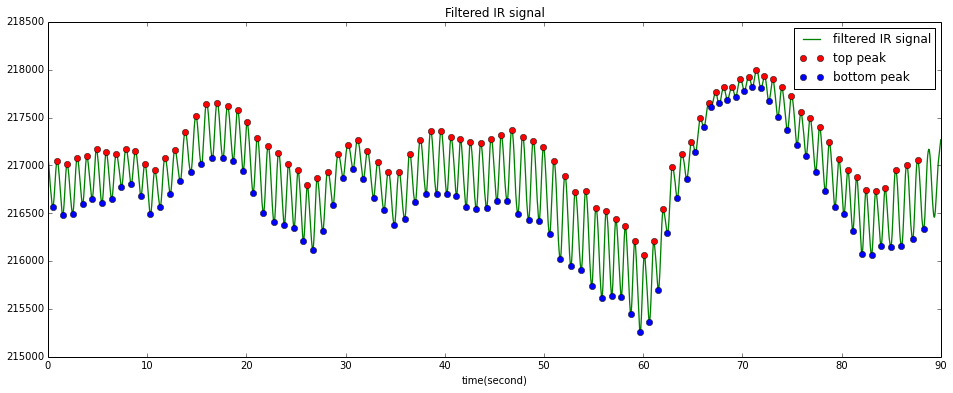

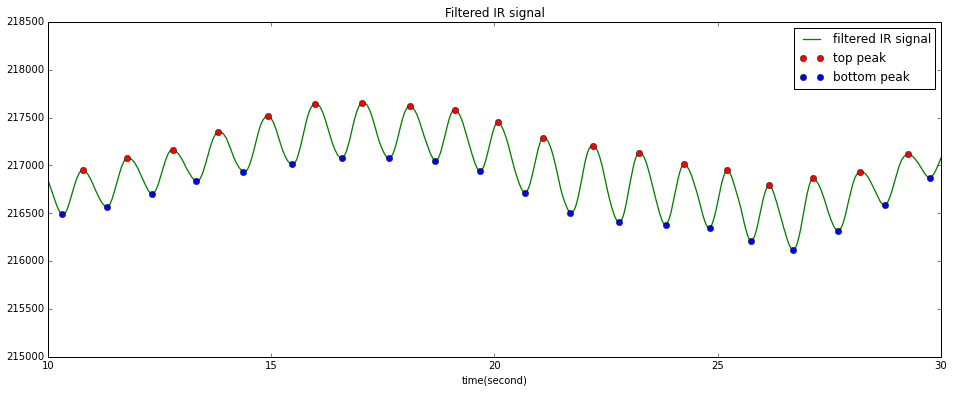

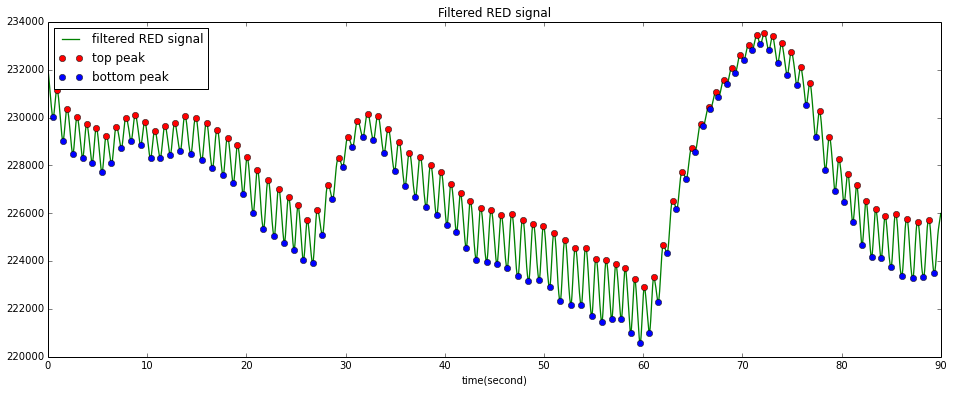

[95.652256537871565, 95.654413937148149, 95.665439266974474, 95.704844743698104, 95.684834391616519, 95.582940917979315, 95.644353563535375, 95.649199934969417, 95.635215511262118, 95.643835381258725, 95.579057654677783, 95.628823762632791, 95.705540936347276, 95.725986141871076, 95.668621440778793, 95.626031250087138, 95.671926916320203, 95.703640050390476, 95.69210143979204, 95.706318725195928, 95.709662035543062, 95.65483501075245, 95.645994065328011, 95.732865379380272, 95.716142395564717, 95.637382345281125, 95.550081729914538, 95.530502871509952, 95.504608739028569, 95.545952136805184, 95.541744203563354, 95.619981971477969, 95.66024444632329, 95.616417911135031, 95.636916076118126, 95.578441169891391, 95.693624729779515, 95.659004676362713, 95.683976228827831, 95.705390719675691, 95.684249434536071, 95.725873671687168, 95.735558392945947, 95.725153373465943, 95.70278310036025, 95.691678525552391, 95.679289792716418, 95.654317079949067, 95.655126527059494, 95.66412247607515, 95.6

In [138]:
%matplotlib inline

from scipy.signal import butter, lfilter
from numpy import average

# Creates and returns Butterworth bandpass filter by given cutoff frequencies, sampling rate, and order
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a

# Applies Butterworth bandpass filter to given data and returns filtered data
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Counts peaks of given dataset
def count_peaks(dataset):
    top_peak_time = []
    top_peak_val = []
    bottom_peak_time = []
    bottom_peak_val = []
    for (num, data) in enumerate(dataset):
        if 1 < num < len(dataset)-1:
            if dataset[num-1] < data  and data > dataset[num+1]:
                top_peak_time.append(num*0.02)
                top_peak_val.append(data)
            elif dataset[num-1] > data  and data < dataset[num+1]:
                bottom_peak_time.append(num*0.02)
                bottom_peak_val.append(data)
    return top_peak_time, top_peak_val, bottom_peak_time, bottom_peak_val

def remove_unwanted_peaks(arg_time, arg_peak):
    peak_time = []
    peak_val = []
    average_time = 0.70
            
    for (num, time) in enumerate(arg_time):
        if num == 0:
            peak_time.append(time)
            peak_val.append(arg_peak[num])
        elif 0 < num < len(arg_time)-1:
            #if (arg_time[num+1] - peak_time[len(peak_time)-1]) > average_time:
            if (time - peak_time[len(peak_time)-1]) > average_time:
                #print(time, arg_time[num+1], peak_time[len(peak_time)-1], arg_peak[num])
                peak_time.append(time)
                peak_val.append(arg_peak[num])
    return peak_time, peak_val
            

if __name__ == "__main__":
    from numpy import genfromtxt, fft, pi, sqrt
    import matplotlib.pyplot as plt
    from scipy.signal import freqz, savgol_filter
    data = genfromtxt('sample_no_header.csv',delimiter=',') # Be sure to remove the header of "sample.csv" beforehands
    
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 50.0
    lowcut = 1
    highcut = 2

    # Extract sampling time and IR and RED data from CSV file
    time = [row[0] for row in data]
    IR = [row[1] for row in data]
    RED = [row[2] for row in data]

    # Filter IR and RED data
    #Filtered_IR = butter_bandpass_filter(IR, lowcut, highcut, fs, order=6)
    #Filtered_RED = butter_bandpass_filter(RED, lowcut, highcut, fs, order=6)
    Filtered_IR = savgol_filter(IR, 91, 7, mode="nearest")
    Filtered_RED = savgol_filter(RED, 91, 7, mode="nearest")
    
    ########
    ## IR ##
    ########
    
    # Find peak time, peak value and number of peaks in filtered IR data
    top_peak_time, top_peak_val, bottom_peak_time, bottom_peak_val = count_peaks(Filtered_IR)
    top_peak_time, top_peak_val = remove_unwanted_peaks(top_peak_time, top_peak_val)
    bottom_peak_time, bottom_peak_val = remove_unwanted_peaks(bottom_peak_time, bottom_peak_val)
    
    dc_ir = []
    for i, bottom_peak in enumerate(bottom_peak_val):
        if i < len(bottom_peak_val)-1:
            dc_ir.append(bottom_peak+(bottom_peak_val[i+1]-bottom_peak)*(top_peak_time[i]-bottom_peak_time[i])/(bottom_peak_time[i+1]-bottom_peak_time[i]))
    print(dc_ir)
    
    ac_ir = []
    for i, dc in enumerate(dc_ir):
        ac_ir.append(top_peak_val[i]-dc)
    
    # Display filtered data with peaks
    plt.figure(1, figsize=(16, 6))
    plt.xlabel('time(second)')
    plt.plot(time, Filtered_IR, 'g', lw=1.3, label="filtered IR signal")
    plt.plot(top_peak_time, top_peak_val, 'or', label="top peak")
    plt.plot(bottom_peak_time, bottom_peak_val, 'ob', label="bottom peak")
    #plt.plot(top_peak_time, dc_ir, 'og', label="DC IR")
    plt.title('Filtered IR signal')
    plt.legend(loc='best')
    
    # Display bandpass filter Bode plot
    plt.figure(2, figsize=(16, 6))
    plt.xlabel('time(second)')
    plt.plot(time, Filtered_IR, 'g', lw=1.3, label="filtered IR signal")
    plt.plot(top_peak_time, top_peak_val, 'or', label="top peak")
    plt.plot(bottom_peak_time, bottom_peak_val, 'ob', label="bottom peak")
    #plt.plot(top_peak_time, dc_ir, 'og', label="DC IR")
    plt.title('Filtered IR signal')
    plt.legend(loc='best')
    plt.xlim([10, 30])
    #plt.ylim([217500, 218000])
    
    #########
    ## RED ##
    #########
    
    # Find peak time, peak value and number of peaks in filtered IR data
    top_peak_time, top_peak_val, bottom_peak_time, bottom_peak_val = count_peaks(Filtered_RED)
    #top_peak_time, top_peak_val = remove_unwanted_peaks(top_peak_time, top_peak_val)
    #bottom_peak_time, bottom_peak_val = remove_unwanted_peaks(bottom_peak_time, bottom_peak_val)
    
    dc_red = []
    for i, bottom_peak in enumerate(bottom_peak_val):
        if i < len(bottom_peak_val)-1:
            dc_red.append(bottom_peak+(bottom_peak_val[i+1]-bottom_peak)*(top_peak_time[i]-bottom_peak_time[i])/(bottom_peak_time[i+1]-bottom_peak_time[i]))
    
    ac_red = []
    for i, dc in enumerate(dc_red):
        ac_red.append(top_peak_val[i]-dc)
    
    # Display filtered data with peaks
    plt.figure(3, figsize=(16, 6))
    plt.xlabel('time(second)')
    plt.plot(time, Filtered_RED, 'g', lw=1.3, label="filtered RED signal")
    plt.plot(top_peak_time, top_peak_val, 'or', label="top peak")
    plt.plot(bottom_peak_time, bottom_peak_val, 'ob', label="bottom peak")
    #plt.plot(top_peak_time, dc_red, 'og', label="DC RED")
    plt.title('Filtered RED signal')
    plt.legend(loc='best')
    
    # Display bandpass filter Bode plot
    #plt.figure(4, figsize=(16, 6))
    #plt.xlabel('time(second)')
    #plt.plot(time, Filtered_RED, 'g', lw=1.3, label="filtered RED signal")
    #plt.plot(top_peak_time, top_peak_val, 'or', label="top peak")
    #plt.plot(bottom_peak_time, bottom_peak_val, 'ob', label="bottom peak")
    #plt.plot(top_peak_time, dc_red, 'og', label="DC RED")
    #plt.title('Filtered RED signal')
    #plt.legend(loc='best')
    #plt.xlim([65, 75])
    #plt.ylim([217500, 218000])
    
    plt.show()
    
    # Calculate SPO2
    spo2 = []
    for i in range(len(dc_ir)):
        r = ac_red[i]*dc_ir[i]/(ac_ir[i]*dc_red[i])/100
        #print(r)
        spo2.append(-45.060*r*r+30.354*r+94.845)
    print(spo2)